# Introduction

In the vibrant housing market of King County, understanding the factors that influence home prices is essential for real estate professionals, homeowners, and potential buyers. As the region continues to grow and evolve, stakeholders must analyze the dynamics of the housing landscape to make informed decisions. This project aims to analyze the King County House Sales dataset to uncover key determinants of housing prices. By employing regression modeling techniques, we seek to provide valuable insights into how various features, such as home size, condition, and location, impact property values. These findings will help stakeholders optimize their strategies for buying, selling, and renovating homes.

# Business Understanding

This project addresses the need for a real estate agency to provide homeowners with data-driven advice on how home renovations can increase property values. By analyzing the King County House Sales dataset using regression modeling, we aim to identify key features that significantly impact home prices, enabling homeowners to make informed decisions on renovation investments.

## Objectives:

This project aims to address the following key objectives:

1. **Analyze the Impact of Square Footage on Housing Prices:** Use simple linear regression to evaluate how sqft_living and sqft_above individually impact house prices in King County. This will quantify the relationship between square footage and property values, providing clear insights for homeowners and real estate investors.

2. **Identify Key Determinants of Housing Prices:** Utilize multiple linear regression modeling to analyze the King County House Sales dataset and determine the primary factors that influence housing prices. This comprehensive analysis will include bathrooms, sqft_living, grade, sqft_above, and sqft_lot15, allowing for a holistic understanding of the factors that drive property values.

3. **Develop Predictive Model for House Pricing:** Create and refine a predictive model using multiple linear regression to accurately estimate house prices based on the identified key features. This model will assist real estate professionals and homeowners in making informed pricing and investment decisions, enhancing the efficiency and effectiveness of the home buying and selling process.

## Module Imports

In [35]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


### Data loading

In [36]:
df = pd.read_csv("./data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [37]:
df.shape


(21597, 21)

In [38]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Data Understanding

### King County Housing Dataset Column Descriptions

1. id - Unique identifier for a house
2.	date - Date when the house was sold
3.	price - Sale price of the house (prediction target)
4.	bedrooms - Number of bedrooms in the house
5.	bathrooms - Number of bathrooms in the house
6.	sqft_living - Square footage of the interior living space
7.	sqft_lot - Square footage of the lot
8.	floors - Number of floors (levels) in the house
9.	waterfront - Indicates whether the house has a view of the waterfront
10.	view - Number of times the house has been viewed
11.	condition - Overall condition of the house
12.	grade - Overall grade of the house based on the King County grading system
13.	sqft_above - Square footage of the house apart from the basement
14.	sqft_basement - Square footage of the basement
15.	yr_built - Year the house was built
16.	yr_renovated - Year the house was renovated
17.	zipcode - ZIP code of the house's location
18.	lat - Latitude coordinate of the house
19.	long - Longitude coordinate of the house
20.	sqft_living15 - Square footage of interior living space for the nearest 15 neighbors
21.	sqft_lot15 - Square footage of the land lots of the nearest 15 neighbors


The King County House Sales dataset contains detailed information on house attributes, sales prices, and locations. With 21 features covering aspects like square footage, number of bedrooms, bathrooms, and renovations, it provides a comprehensive view of factors influencing house prices. The dataset is robust and well-suited for regression analysis to identify key determinants of housing prices. This makes it ideal for providing actionable insights to homeowners and real estate professionals on how specific home features and renovations can impact property values.

# Data Preparation


Getting the shape of our dataframe

In [39]:
df.shape

(21597, 21)

- **Number of Rows (Observations):** There are 21597 rows in the DataFrame.
- **Number of Columns (Variables):** There are 21 columns (or variables) in the DataFrame.

Getting information about our data

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Data description for numerical columns

In [41]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Analysis for null variables

In [42]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The output indicates the count of missing values (NaN or null values) for each column in the King County Housing dataset:


    'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15'],
    dtype='object': : No missing values.
    'waterfront'= 2376 missing values
    'view'= 63 missing values
    'yr_renovated'= 3842 missing values






In [43]:
# Fill missing values
df['waterfront'] = df['waterfront'].fillna(0)
# Drop the 'view' column with missing values
df.drop('view', axis=1, inplace=True)

# Impute missing values in 'yr_renovated' with the mode
df['yr_renovated'].fillna(df['yr_renovated'].mode()[0], inplace=True)

`waterfront`: As it has 2376 missing values, we replaced missing values with 0 (assuming that missing values mean the house does not have a waterfront view).

`view`: It has only 63 missing values, so we dropped the missing values since they are insignificant.

`yr_renovated`: Since there are 3842 missing values, we replaced missing values with 0 (assuming the house was not renovated).

Rechecking for null values

In [44]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We found no null values

## Pair plot

# Feature Selection

### Correlation HeatMap

<AxesSubplot:>

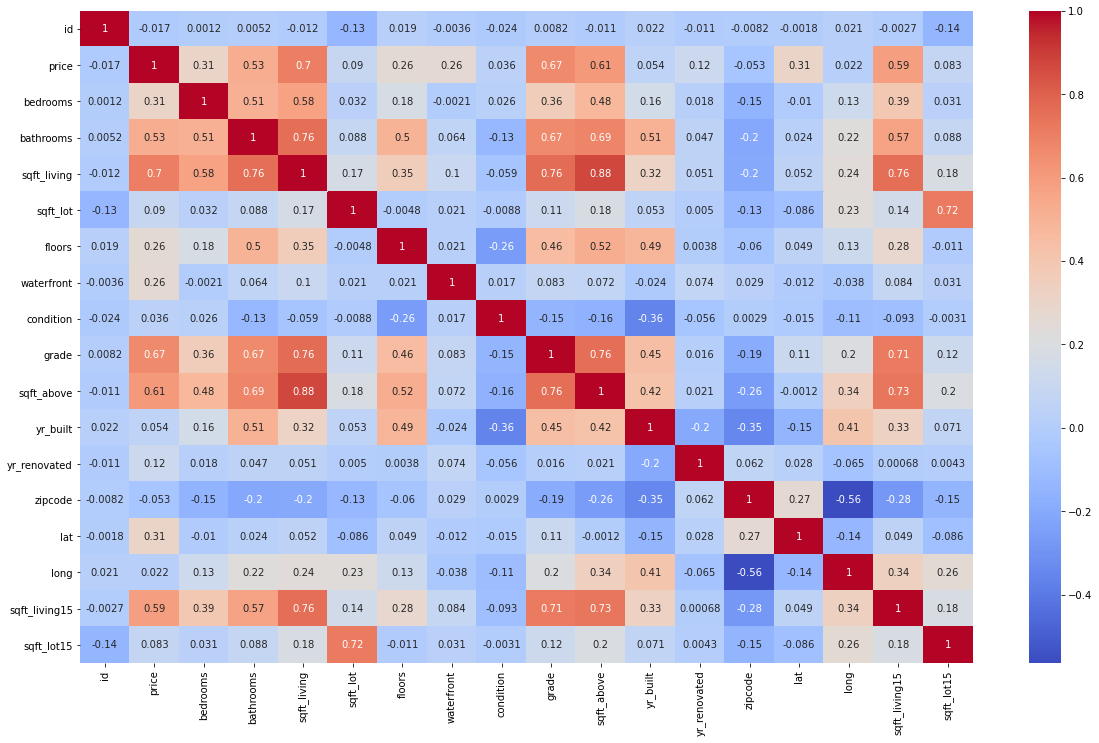

In [45]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

After analyzing the correlation heatmap, it is evident that the most important features influencing house prices are `bathrooms`, `sqft_living`, `grade`, `sqft_above`, and `sqft_lot15`. This conclusion is based on their strong correlation values with the `price` variable. 
- `bathrooms` (0.53): Indicates a moderate positive correlation, suggesting that houses with more bathrooms tend to have higher prices.
- `sqft_livin`g (0.70): Shows a strong positive correlation, meaning that larger living areas significantly increase house prices.
- `Grade` (0.67): Demonstrates a strong positive correlation, implying that higher quality and better-graded houses are priced higher.
- `sqft_above` (0.61): Reflects a strong positive correlation, indicating that houses with more above-ground living space are more expensive.
- `sqft_lot15` (0.59): Indicates a moderate to strong positive correlation, suggesting that larger lots in the vicinity (nearest 15 neighbors) tend to increase a house's value.

These correlation values highlight the significant impact of these features on house prices, guiding homeowners and real estate professionals in their decision-making processes.

In [46]:
# selecting most important features
df = df[[ "bathrooms", "sqft_living", "grade", "price", "sqft_above", "sqft_lot15"]]
["sqft_living", "bathrooms", "bedrooms", "condition", "floors"]

Checking for outliers

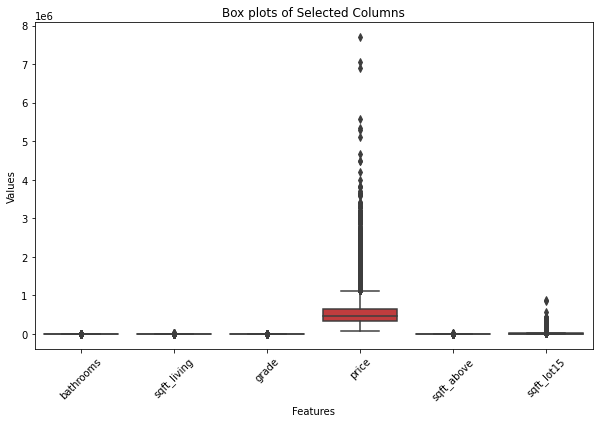

In [47]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Get the outliers

### Removing outliers

### Check for duplicates

In [48]:
df.duplicated().sum()

24

Drop Duplicate rows

In [49]:

df.drop_duplicates(inplace=True)

Cheeck duplicates again

In [50]:
df.duplicated().sum()

0

## Data Analysis

###  **Analysis 1**

Analyze the Impact of Square Footage on Housing Prices using simple liner regression:

  - Selecting the feature (sqft_living) and target (price)

In [51]:
# Selecting the feature (sqft_living) and target (price)
X = df['sqft_living']
y = df['price']

# Adding a constant term to the predictor
X = sm.add_constant(X)

 - Fitting the Simple Linear Regression Model

In [52]:
# Fitting the simple linear regression model
model = sm.OLS(y, X).fit()

# Making predictions based on the model
predictions = model.predict(X)

# Printing the model summary to evaluate performance
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.096e+04
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:21:47   Log-Likelihood:            -2.9974e+05
No. Observations:               21573   AIC:                         5.995e+05
Df Residuals:                   21571   BIC:                         5.995e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.424e+04   4413.582    -10.024      

- interpretation

The R-squared value of 0.493 indicates that approximately 49.3% of the variability in house prices can be explained by the square footage of the living area (sqft_living). This suggests a moderate level of explanatory power of the model.

The model coefficients show that the intercept (const) is -44,150, which is statistically significant with a t-statistic of -10.005 and a p-value of 0.000. The coefficient for sqft_living is 280.9164, also highly significant with a t-statistic of 144.785 and a p-value of 0.000, indicating a strong positive relationship between square footage and house prices.

 - Plotting the Regression Results

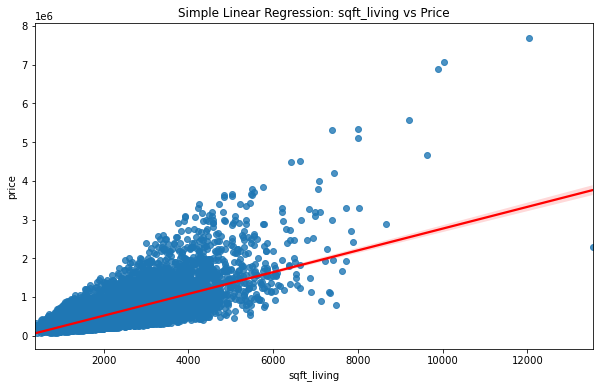

In [53]:
# Plotting the regression line along with the data points
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_living', y='price', data=df, line_kws={"color": "red"})

# Adding title and displaying the plot
plt.title('Simple Linear Regression: sqft_living vs Price')
plt.show()

 - Train Test Split

In [54]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 - Modeling

In [55]:
# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

 - Prediction

In [56]:
# Making predictions on the test set
y_pred = model.predict(X_test)


 - Model Validation

In [57]:
# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')


MAE: 173643.84593155983
MSE: 67356680093.03911
R2: 0.4923005883581033


### **Analysis 2**

Identifying Key Determinants of Housing Prices through  Multiple Linear Regression

 - Assign

In [60]:
# Multiple linear regression
features = ['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_lot15']
X = df[features]
y = df['price']
X = sm.add_constant(X)  # Adds a constant term to the predictors

 - Fitting the  Model

In [61]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     5173.
Date:                Thu, 18 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:08:13   Log-Likelihood:            -2.9856e+05
No. Observations:               21573   AIC:                         5.971e+05
Df Residuals:                   21567   BIC:                         5.972e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.493e+05   1.36e+04    -47.855      